In [1]:
import pandas as pd
 
# Load the first 200,000 rows of the metadata file
df = pd.read_csv("metadata.csv", nrows=200000)

#Print the dimensions of the dataset
print("Shape (rows, columns):", df.shape)

# Print the data types within the dataset
print("\nData types:")
print(df.dtypes)

# Identifying the number of missing values in the dataset
important_cols = ["title", "abstract", "authors", "journal", "publish_time", "source_x"]
print("\nMissing values in important columns:")
print(df[important_cols].isnull().sum())

# Descriptive statistics
print("\nSummary statistics for numerical columns:")
print(df.describe())

# ---Content checks ---
print("\nSample titles:")
print(df['title'].dropna().head(5))

print("\nUnique journals count:", df['journal'].nunique())
print("Unique authors count:", df['authors'].nunique())
print("Publication years range:", df['publish_time'].dropna().min(), "to", df['publish_time'].dropna().max())


C:\Users\Elijah\AppData\Local\Temp\ipykernel_9880\1819486071.py:4: DtypeWarning: Columns (1,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv", nrows=200000)


Shape (rows, columns): (200000, 19)

Data types:
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

Missing values in important columns:
title             423
abstract        51951
authors         11905
journal          5981
publish_time       79
source_x            0
dtype: int64

Summary statistics for numerical columns:
       mag_id         s2_id
count     0.0  1.204650e+05
mean      NaN  1.825493e+08
std       NaN  8.632217e+07
min       NaN  1.695000e+03
25%       NaN  2.062899e+08
50%       N

In [2]:
import pandas as pd

# Load the first 200,000 rows of the file
df = pd.read_csv("metadata.csv", nrows=200000)

#  Identify the count and percentage of missing values 
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

#Print the sum and percentage of missing data for the different fields
print("Top 15 columns with most missing values:")
print(pd.concat([missing, missing_percent], axis=1, keys=['Missing Count', 'Missing %']).head(15))

# If a column has greater than 80% missing data drop it
threshold = 0.8 * len(df)
df_clean = df.dropna(axis=1, thresh=threshold)

# Define essential columns
essential_cols = ["title", "publish_time", "authors", "journal", "source_x"]

# Keep only the ones present in the  dataset
essential_cols = [col for col in essential_cols if col in df_clean.columns]

# Drop rows missing essential columns 
df_clean = df_clean.dropna(subset=essential_cols)

# If any row is missing data in the columns journal , authors or source_x fill it in with 'unknown'
for col in ["journal", "authors", "source_x"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("Unknown")

# Fill numeric gaps with median value
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Save the formatted version of the dataset to new a file
df_clean.to_csv("cord_metadata_clean.csv", index=False)

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


C:\Users\Elijah\AppData\Local\Temp\ipykernel_9880\2600639281.py:4: DtypeWarning: Columns (1,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv", nrows=200000)


Top 15 columns with most missing values:
                  Missing Count  Missing %
mag_id                   200000   100.0000
arxiv_id                 199911    99.9555
who_covidence_id         194733    97.3665
pmc_json_files           144579    72.2895
pdf_json_files           141044    70.5220
sha                      141044    70.5220
pmcid                    120465    60.2325
s2_id                     79535    39.7675
pubmed_id                 52422    26.2110
abstract                  51951    25.9755
authors                   11905     5.9525
journal                    5981     2.9905
title                       423     0.2115
publish_time                 79     0.0395
cord_uid                      0     0.0000

Original shape: (200000, 19)
Cleaned shape: (182490, 9)


In [3]:
import pandas as pd

# Load cleaned dataset 
df = pd.read_csv("cord_metadata_clean.csv")

# Convert date columns to datetime format 
if "publish_time" in df.columns:
    df["publish_time"] = pd.to_datetime(df["publish_time"],errors='coerce')

# Extract year from publication date 
if "publish_time" in df.columns:
    df["publish_year"] = df["publish_time"].dt.year

# Checking if the datatype conversion was succesful 
print("\nData types after processing:")
print(df.dtypes)

#Print a sample of the new row layout
print("\nSample rows with new field:")
print(df[["title", "publish_time", "publish_year"]].head())

#  Overwrite the cleaned metadata file 
df.to_csv("cord_metadata_clean.csv", index=False)



Data types after processing:
cord_uid                object
source_x                object
title                   object
doi                     object
license                 object
publish_time    datetime64[ns]
authors                 object
journal                 object
url                     object
publish_year           float64
dtype: object

Sample rows with new field:
                                               title publish_time  \
0  Clinical features of culture-proven Mycoplasma...   2001-07-04   
1  Nitric oxide: a pro-inflammatory mediator in l...   2000-08-15   
2    Surfactant protein-D and pulmonary host defense   2000-08-25   
3               Role of endothelin-1 in lung disease   2001-02-22   
4  Gene expression in epithelial cells in respons...   2001-05-11   

   publish_year  
0        2001.0  
1        2000.0  
2        2000.0  
3        2001.0  
4        2001.0  


In [4]:
import pandas as pd
from collections import Counter
import re

# Load the dataset
df = pd.read_csv("cord_metadata_clean.csv")

# Count papers by publication year 
if "publish_year" in df.columns:
    papers_by_year = df["publish_year"].value_counts().sort_index()
    print("Papers by publication year:")
    print(papers_by_year)

# Identify top publishing journals
if "journal" in df.columns:
    top_journals = df["journal"].value_counts().head(10)
    print("\n Top 10 Journals:")
    print(top_journals)

#  Find most frequent words in titles 
if "title" in df.columns:
    titles = df["title"].dropna().str.lower()
    words = []
    for t in titles:
        tokens = re.findall(r"\b[a-z]{4,}\b", t)  # words with 4+ letters
        words.extend(tokens)
    
    # Count frequencies
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    
    print("\nTop 20 Most Frequent Words in Titles:")
    for word, count in common_words:
        print(f"{word}: {count}")


Papers by publication year:
publish_year
1957.0        1
1962.0        1
1964.0        2
1969.0        2
1970.0        4
1971.0        4
1972.0        6
1973.0        4
1974.0        7
1975.0       12
1976.0        8
1977.0       10
1978.0        7
1979.0        6
1980.0       13
1981.0        9
1982.0        9
1983.0        2
1984.0       16
1985.0        7
1986.0       16
1987.0        9
1988.0       15
1989.0       15
1990.0       21
1991.0       11
1992.0       28
1993.0       20
1994.0       18
1995.0       14
1996.0       23
1997.0       23
1998.0       37
1999.0       53
2000.0       89
2001.0       66
2002.0      352
2003.0      309
2004.0      425
2005.0      322
2006.0      546
2007.0      489
2008.0      701
2009.0     1017
2010.0      715
2011.0      782
2012.0      879
2013.0      929
2014.0      969
2015.0     1006
2016.0     1358
2017.0     1174
2018.0     1259
2019.0     2382
2020.0    53547
2021.0    52760
2022.0    16998
2023.0        1
2024.0        1
Name: count, dt

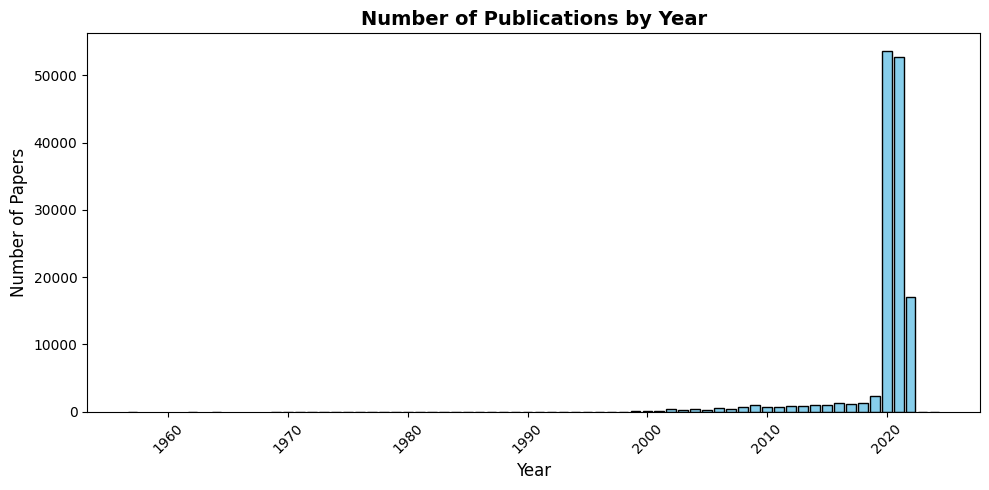

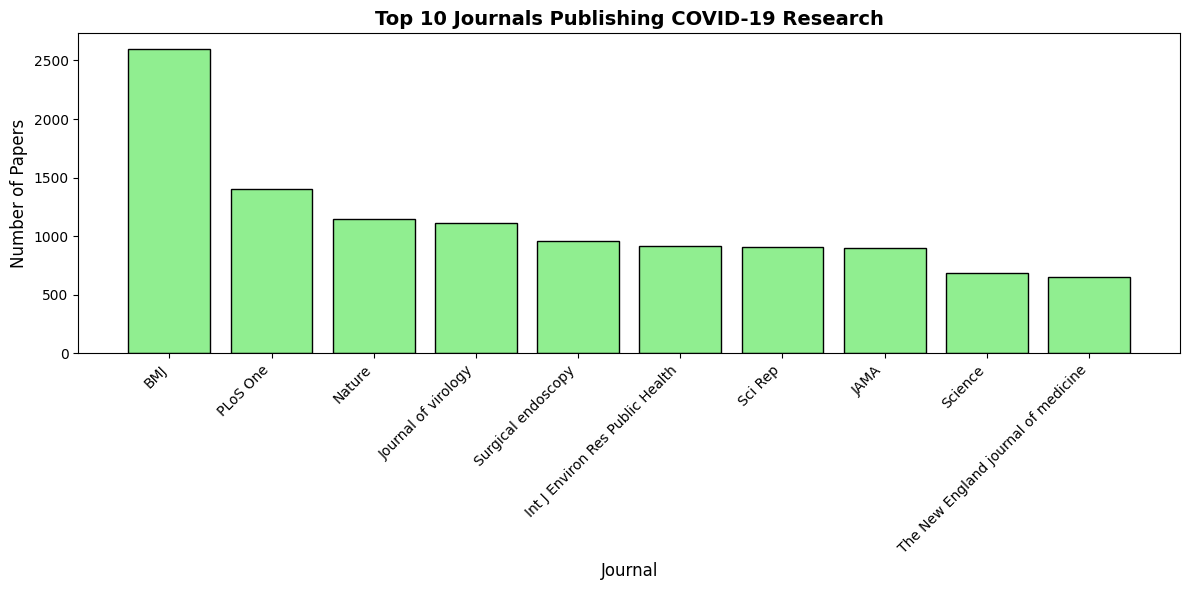

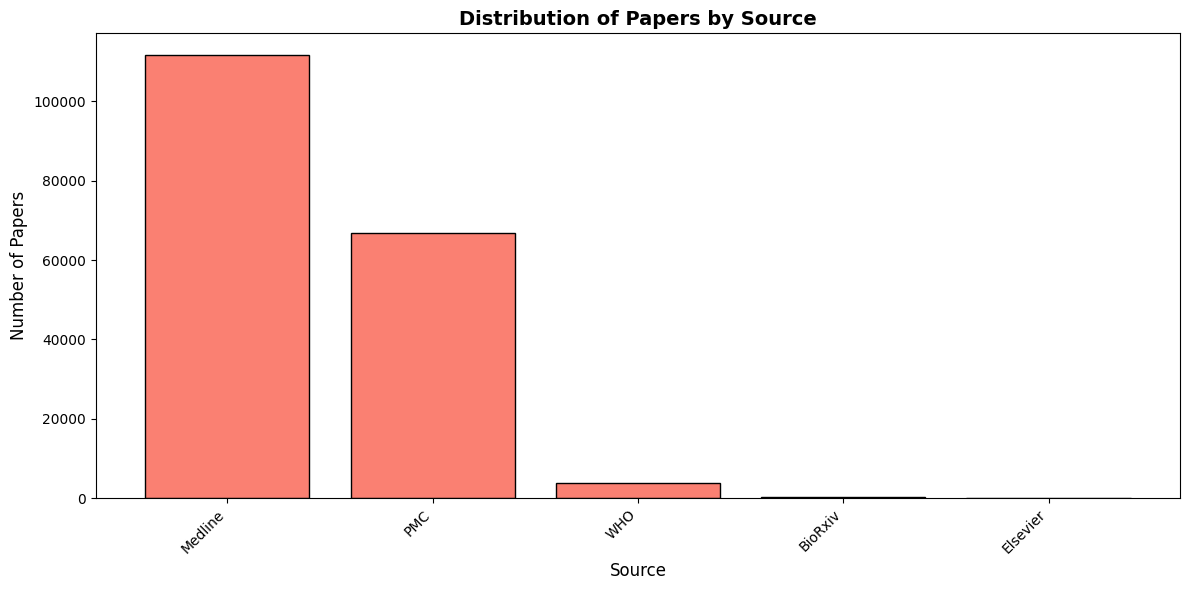

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# --- Number of publications per year ---
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df["publish_year"] = df["publish_time"].dt.year
pubs_per_year = df["publish_year"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(pubs_per_year.index.astype(int), pubs_per_year.values, color="skyblue", edgecolor="black")
plt.title("Number of Publications by Year", fontsize=14, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- Top 10 publishing journals ---
top_journals = df["journal"].value_counts().head(10)

plt.figure(figsize=(12,6))
plt.bar(top_journals.index, top_journals.values, color="lightgreen", edgecolor="black")
plt.title("Top 10 Journals Publishing COVID-19 Research", fontsize=14, weight="bold")
plt.xlabel("Journal", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# --- Distribution of papers by source ---
source_counts = df["source_x"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(source_counts.index, source_counts.values, color="salmon", edgecolor="black")
plt.title("Distribution of Papers by Source", fontsize=14, weight="bold")
plt.xlabel("Source", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



